### Generating some sample data and putting into a form that Keras can deal with.

In [64]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

Samples are the data itself without the labels, and labels are the actual labels for the data.

Samples in Keras need to be in the form of a numpy array or a list of numpy arrays, and the labels need to be in a numpy array.

In [65]:
train_labels = []
train_samples = []

* An Experimental drug was tested on individuals from ages 13 to 100
* The trial had 2100 participants. Half < 65 years old and Half > 65 years old
* 95% of patients 65 or older experienced side effects
* 95% of patients under 65 experienced no side effects

Train a neural net to determine whether or not a person is likely to experience side effects based on training data

In [66]:
# create 50 instances of unexpected behavior
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)
    
# create 1000 instances of expected behavior
for i in range(1000):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [67]:
print(train_samples[:10])
print(train_labels[:10])

[18, 70, 51, 73, 56, 70, 41, 100, 37, 95]
[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [68]:
row_count = 0
for age, label in zip(train_samples, train_labels):
    if row_count < 10:
        print(age, label)
    row_count += 1

18 1
70 0
51 1
73 0
56 1
70 0
41 1
100 0
37 1
95 0


Convert both training data and labels to numpy arrays since that's what Keras expects

In [69]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

It might be difficult for the neural net to learn from ages ranging from 13 to 100, so scaling the data in the range of 0 to 1 may help.

fit_transform does not accept 1D arrays be default, so you need to reshape it to have a shape of -1, 1, where the -1 means that numpy will figure out the number of rows needed

In [70]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_train_samples \
= scaler.fit_transform((train_samples) \
                       .reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Now our data is scaled bewteen 0 and 1 to make it easier for the NN to learn from.

In [71]:
counter = 0
for i in scaled_train_samples:
    if counter < 10:
        print(i)
    counter += 1

[0.05747126]
[0.65517241]
[0.43678161]
[0.68965517]
[0.49425287]
[0.65517241]
[0.32183908]
[1.]
[0.27586207]
[0.94252874]


### How to create a NN model

In [72]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Check which backend we are using

In [73]:
keras.backend.backend()

'tensorflow'

A sequential model is a linear stack of layers. You can add one by one or pass the layers into the constructor directly. Tuple of (1,) to specify 1D input data.

16 neurons in the first layer.

32 neurons in the second layer.

The choice of 16 and 32 neurons is pretty arbitrary. The more complex your data, the more neurons in each layer you will likely need. Generally, the number of neurons increases with each layer as the layers become deeped in the network. Picking neuron amount is trial and error and experience.

Keras implicitly creates the input layer behind the scenes based on the input_shape parameter that you pass to the first hidden layer. Instead, the first layer that you see is actually the first hidden layer. For the first layer you specify, you can have as little or as many neurons as you'd like, regardless of your input shape because the layer you're working with actually isn't the input layer. Keras is handling the input layer for you without you explicitly defining it.

In [74]:
model = Sequential([
    Dense(16, input_shape=(1,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax') # 2 categories of binary response
])

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


The weights are represented as the connections between the layers. So, in the model in this video, we have connections from the implicit input layer to the first hidden layer. Then the first hidden layer to the second hidden layer. Then the second hidden layer to the output layer. Three total. If you run `model.layers[0].get_weights()`, you can see the weight matrix corresponding to the input layer. Then If you sub 1 for 0, you can see it for the first hidden layer, and then sub 2 for the second hidden layer. Total, when you do this, you will see three matrices.

You also see another matrix along with each matrix that is likely the bias vector. 

In [77]:
model.layers[0].get_weights()

[array([[ 0.03638083,  0.4454013 ,  0.12581259,  0.51573265, -0.44820958,
         -0.40748942,  0.22367728,  0.52067506,  0.03711224,  0.35321116,
          0.30606246,  0.4332205 , -0.09076774, -0.36407185, -0.51899564,
         -0.36801404]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)]

Now compile the model.

In [78]:
model.compile(Adam(lr = 0.0001),
                   loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

Batch_size is number of training examples to group together at once. Instead of looking at each individual sample one by one, let's have the NN look at 10 samples together at a time.

epochs is the number of times you want to train your model. Here we choose 20 training runs.

In [79]:
model.fit(scaled_train_samples
          , train_labels
          , batch_size = 10 
          , epochs = 20
          , shuffle = True 
          , verbose = 2)

Epoch 1/20
 - 1s - loss: 0.6612 - acc: 0.5576
Epoch 2/20
 - 0s - loss: 0.6291 - acc: 0.6286
Epoch 3/20
 - 0s - loss: 0.5866 - acc: 0.7176
Epoch 4/20
 - 0s - loss: 0.5357 - acc: 0.7933
Epoch 5/20
 - 0s - loss: 0.4918 - acc: 0.8305
Epoch 6/20
 - 0s - loss: 0.4538 - acc: 0.8533
Epoch 7/20
 - 0s - loss: 0.4199 - acc: 0.8724
Epoch 8/20
 - 0s - loss: 0.3907 - acc: 0.8881
Epoch 9/20
 - 0s - loss: 0.3662 - acc: 0.9019
Epoch 10/20
 - 0s - loss: 0.3464 - acc: 0.9110
Epoch 11/20
 - 0s - loss: 0.3301 - acc: 0.9152
Epoch 12/20
 - 0s - loss: 0.3167 - acc: 0.9190
Epoch 13/20
 - 0s - loss: 0.3061 - acc: 0.9224
Epoch 14/20
 - 0s - loss: 0.2975 - acc: 0.9262
Epoch 15/20
 - 0s - loss: 0.2905 - acc: 0.9267
Epoch 16/20
 - 0s - loss: 0.2848 - acc: 0.9295
Epoch 17/20
 - 0s - loss: 0.2800 - acc: 0.9295
Epoch 18/20
 - 0s - loss: 0.2763 - acc: 0.9338
Epoch 19/20
 - 0s - loss: 0.2728 - acc: 0.9333
Epoch 20/20
 - 0s - loss: 0.2699 - acc: 0.9352


### Using a Validation Set

In [80]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax') # 2 categories of binary response
])

In [81]:
model2.compile(Adam(lr = 0.0001),
                   loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

In [82]:
model2.fit(scaled_train_samples
          , train_labels
          , validation_split = 0.1 # split out 10% data
          , batch_size = 10 
          , epochs = 20
          , shuffle = True 
          , verbose = 2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 1s - loss: 0.6889 - acc: 0.5175 - val_loss: 0.6638 - val_acc: 0.5667
Epoch 2/20
 - 0s - loss: 0.6484 - acc: 0.6122 - val_loss: 0.6254 - val_acc: 0.6571
Epoch 3/20
 - 0s - loss: 0.6162 - acc: 0.6608 - val_loss: 0.5920 - val_acc: 0.6762
Epoch 4/20
 - 0s - loss: 0.5864 - acc: 0.7101 - val_loss: 0.5588 - val_acc: 0.7381
Epoch 5/20
 - 0s - loss: 0.5570 - acc: 0.7471 - val_loss: 0.5277 - val_acc: 0.7714
Epoch 6/20
 - 0s - loss: 0.5301 - acc: 0.7741 - val_loss: 0.4985 - val_acc: 0.8143
Epoch 7/20
 - 0s - loss: 0.5043 - acc: 0.8016 - val_loss: 0.4697 - val_acc: 0.8286
Epoch 8/20
 - 0s - loss: 0.4794 - acc: 0.8212 - val_loss: 0.4420 - val_acc: 0.8429
Epoch 9/20
 - 0s - loss: 0.4556 - acc: 0.8397 - val_loss: 0.4149 - val_acc: 0.8476
Epoch 10/20
 - 0s - loss: 0.4332 - acc: 0.8513 - val_loss: 0.3893 - val_acc: 0.8619
Epoch 11/20
 - 0s - loss: 0.4124 - acc: 0.8661 - val_loss: 0.3653 - val_acc: 0.8857
Epoch 12/20
 - 0s - loss: 0.3936 - acc

### Create Synthetic Testing Data

In [83]:
test_samples = []
test_labels = []

In [84]:
for i in range(10):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

Convert to numpy to be acceptable by Keras

In [85]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)

The same MinMaxScaler object that was used on the training samples should also be used on the test samples (rather than creating a second MinMaxScaler) so that the test data can be scaled to the same scale as the training data.

In [87]:
scaled_test_samples = scaler.fit_transform((test_samples)\
               .reshape(-1, 1))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Make Predictions

In [88]:
predictions = model2.predict(scaled_test_samples
                             , batch_size = 10 
                             , verbose = 0)

These are probabilities that add up to 1.

In [90]:
count = 0
for i in predictions:
    if count < 9:
        print(i)
    count += 1

[0.8977903  0.10220965]
[0.26178682 0.7382132 ]
[0.902375   0.09762496]
[0.0697018 0.9302982]
[0.67445254 0.32554746]
[0.09855071 0.9014493 ]
[0.8996771 0.1003229]
[0.07572607 0.92427385]
[0.58325493 0.41674507]


In [91]:
rounded_predictions = model.predict_classes(scaled_test_samples
                                            , batch_size = 10
                                            , verbose = 0)

In [92]:
count = 0
for elem in rounded_predictions:
    if count < 9:
        print(elem)
    count += 1

0
1
0
1
0
1
0
1
0


### Confusion Matrix

In [96]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
cm = confusion_matrix(test_labels, rounded_predictions)

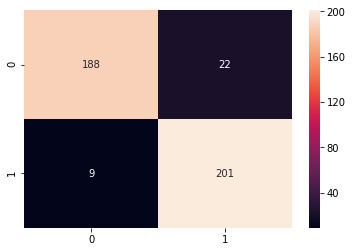

In [97]:
sns.heatmap(cm ,annot=True,fmt='.5g') 

### Saving and Loading up the Model

model.save()

In [100]:
model2.save('medical_trial_model.h5')

In [103]:
from keras.models import load_model
loaded_model = load_model('medical_trial_model.h5')

In [104]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [106]:
# loaded_model.get_weights()

model.to_json() to just save architecture of the model and note its weights or its training configuration

In [107]:
json_string = model2.to_json()

In [108]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_13", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_14", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, 

In [109]:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [110]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


model.save_weights() to only save the weights and not the architecture, so you can create an identical model architecture and use the saved weights.

In [111]:
model2.save_weights('my_model_weights.h5')